In [1]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


df=pd.read_csv('emi_data_final2.csv')
df

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi,total_expenses,expense_to_income_ratio,employment_group,affordability_ratio,credit_risk,employment_stability
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,850000.0,15,Not_Eligible,500.0,59900.0,0.725182,0–2 yrs,0.006053,Medium Risk,Unstable
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,128000.0,19,Not_Eligible,700.0,15400.0,0.716279,6–10 yrs,0.032558,Medium Risk,Stable
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,306000.0,16,Eligible,27775.0,35600.0,0.413473,6–10 yrs,0.322590,Medium Risk,Stable
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,304000.0,83,Eligible,16170.0,37400.0,0.559880,3–5 yrs,0.242066,Medium Risk,Moderate
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,252000.0,7,Not_Eligible,500.0,58600.0,1.022688,3–5 yrs,0.008726,Low Risk,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400019,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,...,506000.0,47,Not_Eligible,500.0,33400.0,1.030864,3–5 yrs,0.015432,Medium Risk,Moderate
400020,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,...,708000.0,33,Not_Eligible,5200.0,38800.0,0.788618,0–2 yrs,0.105691,Medium Risk,Unstable
400021,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,...,93000.0,21,High_Risk,5665.0,15400.0,0.599222,3–5 yrs,0.220428,Medium Risk,Moderate
400022,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,...,144000.0,36,Eligible,14460.0,23100.0,0.489407,3–5 yrs,0.306356,Low Risk,Moderate


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400024 entries, 0 to 400023
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      400024 non-null  int64  
 1   gender                   400024 non-null  object 
 2   marital_status           400024 non-null  object 
 3   education                400024 non-null  object 
 4   monthly_salary           400024 non-null  int64  
 5   employment_type          400024 non-null  object 
 6   years_of_employment      400024 non-null  float64
 7   company_type             400024 non-null  object 
 8   house_type               400024 non-null  object 
 9   monthly_rent             400024 non-null  float64
 10  family_size              400024 non-null  int64  
 11  dependents               400024 non-null  int64  
 12  school_fees              400024 non-null  float64
 13  college_fees             400024 non-null  float64
 14  trav

In [3]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi', 'total_expenses', 'expense_to_income_ratio',
       'employment_group', 'affordability_ratio', 'credit_risk',
       'employment_stability'],
      dtype='object')

In [4]:
df=df.drop(['emi_eligibility','current_emi_amount','total_expenses','expense_to_income_ratio'], axis=1)


In [5]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'credit_score',
       'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount',
       'requested_tenure', 'max_monthly_emi', 'employment_group',
       'affordability_ratio', 'credit_risk', 'employment_stability'],
      dtype='object')

In [6]:
len(df.columns)

29

In [7]:
X=df.drop(['max_monthly_emi'], axis=1)
y=df['max_monthly_emi']  

In [8]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

nominal_cols = ['gender','marital_status','employment_type','company_type','house_type','existing_loans','emi_scenario']
ordinal_cols = ['education','employment_group','credit_risk','employment_stability']  

education_order = ['Unknown','High School','Graduate','Post Graduate','Professional']
employment_group_order = ['0–2 yrs', '6–10 yrs', '3–5 yrs', '20+ yrs', '11–20 yrs'] 
credit_risk_order=['Low Risk','Medium Risk','High Risk'] 
employment_stability_order=['Unstable','Moderate','Stable','Highly Stable']

In [9]:
ct=ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), nominal_cols),
        ('ordinal', OrdinalEncoder(categories=[education_order, employment_group_order, credit_risk_order, employment_stability_order]), ordinal_cols)
    ], remainder='passthrough'
)

In [10]:
X_encoded = ct.fit_transform(X)

In [11]:
encoded_feature_names = (
    ct.named_transformers_['onehot'].get_feature_names_out(nominal_cols).tolist() +
    ordinal_cols +
    [col for col in X.columns if col not in nominal_cols + ordinal_cols]
)
df_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)
df_encoded['max_monthly_emi'] = y.values

df_encoded

,gender_Male,marital_status_Single,employment_type_Private,employment_type_Self-employed,company_type_MNC,company_type_Mid-size,company_type_Small,company_type_Startup,house_type_Own,house_type_Rented,...,travel_expenses,groceries_utilities,other_monthly_expenses,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,affordability_ratio,max_monthly_emi
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,7200.0,19500.0,13200.0,660.0,303200.0,70200.0,850000.0,15.0,0.006053,500.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1400.0,5400.0,3500.0,714.0,92500.0,26900.0,128000.0,19.0,0.032558,700.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,10200.0,19400.0,6000.0,650.0,672100.0,324200.0,306000.0,16.0,0.322590,27775.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,6200.0,11900.0,7900.0,685.0,440900.0,178100.0,304000.0,83.0,0.242066,16170.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3600.0,16200.0,8100.0,770.0,97300.0,28200.0,252000.0,7.0,0.008726,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400019,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2200.0,4900.0,6100.0,649.0,62000.0,32600.0,506000.0,47.0,0.015432,500.0
400020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2600.0,13600.0,8600.0,712.0,142200.0,38100.0,708000.0,33.0,0.105691,5200.0
400021,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2000.0,4600.0,2500.0,676.0,191600.0,39700.0,93000.0,21.0,0.220428,5665.0
400022,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,7000.0,8900.0,7200.0,784.0,170400.0,45600.0,144000.0,36.0,0.306356,14460.0


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
X=df_encoded.drop('max_monthly_emi', axis=1)
y=df_encoded['max_monthly_emi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear_model=LinearRegression()

Linear_model.fit(X_train, y_train)
y_pred_linear=Linear_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   
mae=mean_absolute_error(y_test, y_pred_linear)
mse=mean_squared_error(y_test, y_pred_linear)
r2=r2_score(y_test, y_pred_linear)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2768.1525206658966
Mean Squared Error: 16427766.919122951
R-squared: 0.7272858392752595


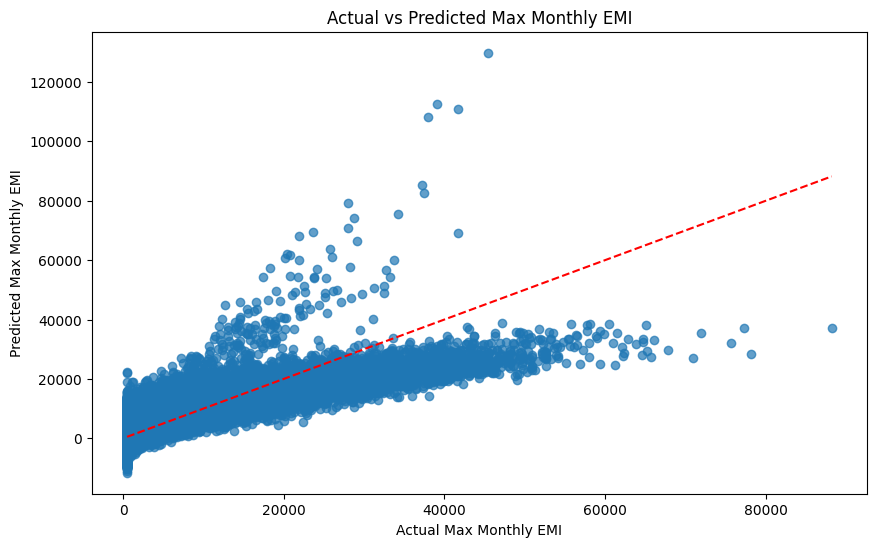

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Max Monthly EMI')
plt.ylabel('Predicted Max Monthly EMI')
plt.title('Actual vs Predicted Max Monthly EMI')
plt.show()

In [14]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, objective='reg:squarederror')
XGB_model.fit(X_train, y_train)
y_pred_xgb = XGB_model.predict(X_test)
mae_xgb=mean_absolute_error(y_test, y_pred_xgb)
mse_xgb=mean_squared_error(y_test, y_pred_xgb)
r2_xgb=r2_score(y_test, y_pred_xgb)
print(f'XGBoost - Mean Absolute Error: {mae_xgb}')
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')

XGBoost - Mean Absolute Error: 117.90015734730824
XGBoost - Mean Squared Error: 153815.33140054712
XGBoost - R-squared: 0.9974465416257722


In [15]:
from sklearn.ensemble import RandomForestRegressor 

RF_model=RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=5,n_jobs=-1,random_state=42)
RF_model.fit(X_train, y_train)
y_pred_rf = RF_model.predict(X_test)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
mse_rf=mean_squared_error(y_test, y_pred_rf)
r2_rf=r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Absolute Error: 78.37169141452782
Random Forest - Mean Squared Error: 40608.32693791201
Random Forest - R-squared: 0.9993258690694949


In [16]:
import pickle 
model_filename='Reg_LR.pkl'
model_filename2='Reg_RF.pkl'
model_filename3='Reg_XGB.pkl'
file_name='Reg_ct.pkl'

with open(model_filename , 'wb') as f: 
    pickle.dump(Linear_model, f)   

with open(model_filename2, 'wb') as f:
    pickle.dump(RF_model, f)

with open(model_filename3, 'wb') as f:
    pickle.dump(XGB_model, f) 

with open(file_name,'wb') as f:
    pickle.dump(ct,f)


In [17]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'credit_score',
       'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount',
       'requested_tenure', 'max_monthly_emi', 'employment_group',
       'affordability_ratio', 'credit_risk', 'employment_stability'],
      dtype='object')

In [18]:
X.columns

Index(['gender_Male', 'marital_status_Single', 'employment_type_Private',
       'employment_type_Self-employed', 'company_type_MNC',
       'company_type_Mid-size', 'company_type_Small', 'company_type_Startup',
       'house_type_Own', 'house_type_Rented', 'existing_loans_Yes',
       'emi_scenario_Education EMI', 'emi_scenario_Home Appliances EMI',
       'emi_scenario_Personal Loan EMI', 'emi_scenario_Vehicle EMI',
       'education', 'employment_group', 'credit_risk', 'employment_stability',
       'age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
       'family_size', 'dependents', 'school_fees', 'college_fees',
       'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
       'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount',
       'requested_tenure', 'affordability_ratio'],
      dtype='object')

In [19]:
len(X.columns)

36

In [20]:
len(df.columns)

29